###  Import Dependiencies

In [184]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

### Input a path to my folder which contains the CSVs

In [185]:
path = (r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs")
CSVFiles = glob.glob(path + "/*.csv")

### Create a list to hold data from all 2019 CSV files

In [186]:
list_data = []

### Create a loop which adds each CSV file in the 'Path' folder into the 'list_data' list

In [187]:
for filename in CSVFiles:
    df = pd.read_csv(filename, index_col=None, header=0)
    list_data.append(df)

C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Create a DataFrame that contains all 11 CSV files 
* The DataFrame contains one file for every available month of 2019
* Print a preview of the DataFrame

In [188]:
all_data_twozeroonenine_df = pd.concat(list_data, axis=0, ignore_index=True)

all_data_twozeroonenine_df.head(5)

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,...,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM,DRV_LIC_STATE,DOB_YEAR,VEH_YEAR,VEH_MAKE,TICKET_NUMBER,VIOLATION_TYPE_DESC
0,8730,1400 BRANCH AVE SE,403440.57,133762.28,2019/04/29 04:00:00+00,1:30:00,6.0,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,...,38.872,-76.96,307585.0,2020/09/30 03:44:25+00,DC,1985.0,NaN,CHRY,NaN,NaN
1,8731,I-295 ANACOSTIA FWY,NaN,NaN,2019/04/01 04:00:00+00,9:55:00,6.0,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,...,NaN,NaN,NaN,2020/09/30 03:44:25+00,DC,1972.0,NaN,HOND,NaN,NaN
2,10053,I 395 N/B HOV BRIDGE SW,NaN,NaN,2019/04/18 04:00:00+00,4:20:00,1.0,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,...,NaN,NaN,NaN,2020/09/30 03:44:25+00,VA,1987.0,NaN,MAZD,NaN,NaN
3,10054,1000 6TH ST NW,398273.55,137243.91,2019/04/23 04:00:00+00,3:00:00,1.0,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,...,38.903,-77.02,807095.0,2020/09/30 03:44:25+00,DC,1993.0,NaN,TOYO,NaN,NaN
4,10055,1000 6TH ST NW,398273.55,137243.91,2019/04/23 04:00:00+00,3:00:00,1.0,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,...,38.903,-77.02,807095.0,2020/09/30 03:44:25+00,DC,1993.0,NaN,TOYO,NaN,NaN


### Let's see what columns we're working with
* Print the column headers using .columns
* Doing so allows us to see which columns we want to keep, and which we want to drop

In [189]:
all_data_twozeroonenine_df.columns

Index(['OBJECTID', 'LOCATION', 'XCOORD', 'YCOORD', 'ISSUE_DATE', 'ISSUE_TIME',
       'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_NAME', 'ISSUING_AGENCY_SHORT',
       'VIOLATION_CODE', 'VIOLATION_PROCESS_DESC', 'PLATE_STATE',
       'ACCIDENT_INDICATOR', 'DISPOSITION_CODE', 'DISPOSITION_TYPE',
       'DISPOSITION_DATE', 'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1',
       'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'RP_MULT_OWNER_NO',
       'BODY_STYLE', 'LATITUDE', 'LONGITUDE', 'MAR_ID', 'GIS_LAST_MOD_DTTM',
       'DRV_LIC_STATE', 'DOB_YEAR', 'VEH_YEAR', 'VEH_MAKE', 'TICKET_NUMBER',
       'VIOLATION_TYPE_DESC'],
      dtype='object')

### Clean up the DataFrame to include only the columns we need for analysis
* : indicates we want to keep all rows
* We determine the columns we want to keep by calling them out by their number
* The resulting DataFrame includes all 11 months (February being our caveat)
* Contains 1201351 rows
* Contains 14 columns

In [190]:
clean_twozeroonenine_df = all_data_twozeroonenine_df.iloc[:, [0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 16, 29, 30, 32]]
clean_twozeroonenine_df.head()

,OBJECTID,LOCATION,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,DRV_LIC_STATE,DOB_YEAR,VEH_MAKE
0,8730,1400 BRANCH AVE SE,2019/04/29 04:00:00+00,1:30:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,100.0,DC,1985.0,CHRY
1,8731,I-295 ANACOSTIA FWY,2019/04/01 04:00:00+00,9:55:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,75.0,DC,1972.0,HOND
2,10053,I 395 N/B HOV BRIDGE SW,2019/04/18 04:00:00+00,4:20:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,VA,Y,100.0,VA,1987.0,MAZD
3,10054,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,DC,Y,150.0,DC,1993.0,TOYO
4,10055,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,DEAD OR EXPIRED TAGS,DC,Y,100.0,DC,1993.0,TOYO


# Question 4: Total number of violations issued for each month and for the year

### Determine the total number of violations issued for the year 
* Using the clean, extracted DataFrame, pull out the Violation Code column
* . count() to get a total count of all violations given out for the 2019 year

In [191]:
total_number_of_violations_year = clean_twozeroonenine_df['VIOLATION_CODE'].count()
total_number_of_violations_year

1201351

### Determine the total number of violations issued Per Month
* Read in each month's csv 
* *I read in each month's CSV because it was the clearest way for me to extract the data. I'm sure there was a way to do it from the combined DataFrame, but I honestly didn't want to spend hours doing so.*

In [192]:
# Read in each month's csv
january_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\January_2019.csv")
march_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\March_2019.csv")
april_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\April_2019.csv")
may_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\May_2019.csv")
june_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\June_2019.csv")
july_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\July_2019.csv")
august_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\August_2019.csv")
september_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\September_2019.cvs.csv")
october_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\October_2019.csv")
november_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\November_2019.csv")
december_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\December_2019.csv")

C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


* Using .count(), I determined the total number of violations issued for each month

In [193]:
# Count the total number of violations for each month
total_number_violations_january = january_df['VIOLATION_CODE'].count()
total_number_violations_march = march_df['VIOLATION_CODE'].count()
total_number_violations_april = april_df['VIOLATION_CODE'].count()
total_number_violations_may = may_df['VIOLATION_CODE'].count()
total_number_violations_june = june_df['VIOLATION_CODE'].count()
total_number_violations_july = july_df['VIOLATION_CODE'].count()
total_number_violations_august = august_df['VIOLATION_CODE'].count()
total_number_violations_september = september_df['VIOLATION_CODE'].count()
total_number_violations_october = october_df['VIOLATION_CODE'].count()
total_number_violations_november = november_df['VIOLATION_CODE'].count()
total_number_violations_december = december_df['VIOLATION_CODE'].count()

* Next, I determined the percent each month made up of the total yearly violations
* (Total Number of Violations for X Month / Total Number of Violations for the Year)(100)

In [194]:
# Determine what percent each month accounts for of total yearly violations

january_percent_to_year_total = (total_number_violations_january / total_number_of_violations_year * 100)
march_percent_to_year_total = (total_number_violations_march / total_number_of_violations_year * 100)
april_percent_to_year_total = (total_number_violations_april / total_number_of_violations_year * 100)
may_percent_to_year_total = (total_number_violations_may / total_number_of_violations_year * 100)
june_percent_to_year_total = (total_number_violations_june / total_number_of_violations_year * 100)
july_percent_to_year_total = (total_number_violations_july / total_number_of_violations_year * 100)
august_percent_to_year_total = (total_number_violations_august / total_number_of_violations_year * 100)
september_percent_to_year_total = (total_number_violations_september / total_number_of_violations_year * 100)
october_percent_to_year_total = (total_number_violations_october / total_number_of_violations_year * 100)
november_percent_to_year_total = (total_number_violations_november / total_number_of_violations_year * 100)
december_percent_to_year_total = (total_number_violations_december / total_number_of_violations_year * 100)

* Then I created a DataFrame to hold the total violations for each month, and the percent each month made up of the total yearly violations issued

In [195]:
# Create a DataFrame that displays the total violations for each month, and each month's percent to total violations

total_number_violations_per_month = pd.DataFrame([{
    "Month":"January", "Number of Violations": total_number_violations_january, "Percent to Total":january_percent_to_year_total},
    {"Month":"March", "Number of Violations": total_number_violations_march, "Percent to Total": march_percent_to_year_total},
    {"Month":"April", "Number of Violations": total_number_violations_april, "Percent to Total": april_percent_to_year_total},
    {"Month":"May", "Number of Violations": total_number_violations_may, "Percent to Total": may_percent_to_year_total},
    {"Month":"June", "Number of Violations": total_number_violations_june, "Percent to Total": june_percent_to_year_total},
    {"Month":"July", "Number of Violations": total_number_violations_july, "Percent to Total": july_percent_to_year_total},
     {"Month":"August", "Number of Violations": total_number_violations_august, "Percent to Total": august_percent_to_year_total},
     {"Month":"September", "Number of Violations": total_number_violations_september, "Percent to Total": september_percent_to_year_total},
     {"Month":"October", "Number of Violations": total_number_violations_october, "Percent to Total": october_percent_to_year_total},
     {"Month":"November", "Number of Violations": total_number_violations_november, "Percent to Total": november_percent_to_year_total},
     {"Month":"December", "Number of Violations": total_number_violations_december, "Percent to Total": december_percent_to_year_total},
])

* I set the index to the Month
* I renamed the column 'Month'
* I printed the DataFrame

In [196]:
#total_number_violations_per_month = total_number_violations_per_month.set_index("Month")
#total_number_violations_per_month.index.name = 'Month'
total_number_violations_per_month

,Month,Number of Violations,Percent to Total
0,January,94947,7.903352
1,March,105344,8.768794
2,April,108258,9.011355
3,May,110614,9.207467
4,June,143351,11.932483
5,July,114773,9.553661
6,August,149324,12.429673
7,September,102942,8.568853
8,October,98173,8.171883
9,November,94186,7.840007


### Two Charts for Total Number of Violations Per Month:
* Bar chart for number of violations per month
* Line chart for number of violations per month

**Bar Chart**
* Barh makes it horizontal
* Legend=False removes the legend
* Color = 'choose desired color'
* Edgecolor = 'outlines the bar in a color'
* Figsize = (makes the chart taller, or longer)
* Fontsize = increases or decreases letter size
* Plt.grid = adds grid lines to chart

**Line Chart**
* Includes most of the same formatting options as above
* Marker = 'different shapes to denote data points'

Text(0.5, 1.0, 'Total Count of Violations per Month for 2019')

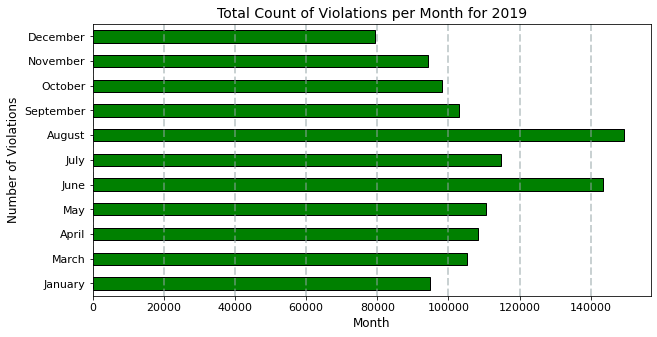

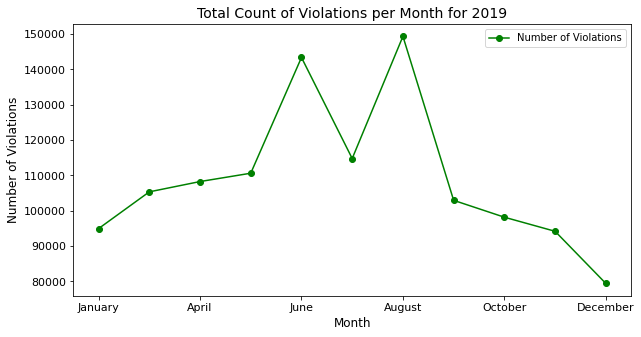

In [197]:
total_number_violations_per_month.plot(kind='barh', x='Month', y='Number of Violations', legend=False, color='green', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Number of Violations', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.5)
plt.title('Total Count of Violations per Month for 2019', fontsize=14)



total_number_violations_per_month.plot(kind='line', x='Month', y='Number of Violations', color='green', marker = 'o', figsize=(10,5), fontsize=11)
plt.ylabel('Number of Violations', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Total Count of Violations per Month for 2019', fontsize=14)

### Two Charts for Each Month's Percent to Total
* Bar chart for percent to total by month
* Line chart for percent to total by month
* *I have no idea why the line chart has ommitted every other month*


**Bar Chart**
* Please see descriptions for previous two charts

**Line Chart**
* Please see descriptions for previous two charts

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

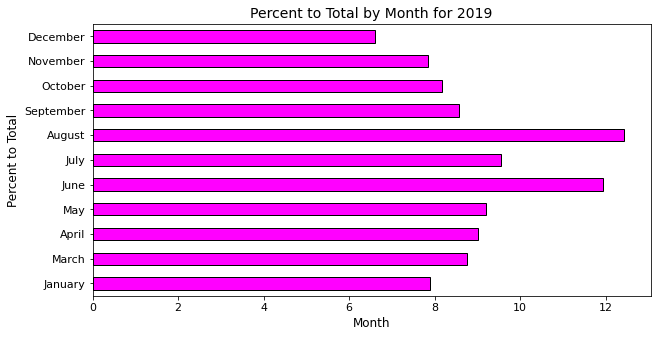

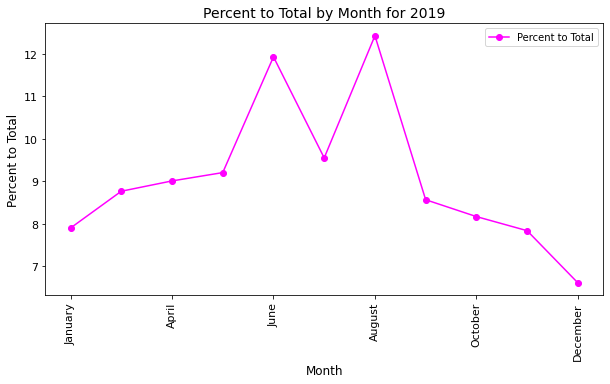

In [198]:
total_number_violations_per_month.plot(kind='barh', x='Month', y='Percent to Total', legend=False, color='magenta', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Percent to Total', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Percent to Total by Month for 2019', fontsize=14)

total_number_violations_per_month.plot(kind='line', x='Month', y='Percent to Total', color='magenta', marker = 'o', figsize=(10,5), fontsize=11)
plt.ylabel('Percent to Total', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Percent to Total by Month for 2019', fontsize=14)
plt.xticks(rotation=90)

# Question 5: Total number of each violation issued for each month and the year

### Determine the count of each type of violation for each month while dropping all unnecessary columns
* Using each individual month's CSV, count the number of violations issued and groupby 'Violation Process Description'
* Rename the column 'OBJECTID' according to the month I was working with in preparation for a new DataFrame which would hold each month's count
* Rename the index from 'VIOLATION_PROCESS_DESC' to 'Violation Desription' for clarity

* Repeat the process for all eleven months of 2019
* **THE END OF THE CELL SHOWS AN EXAMPLE OF HOW EACH MONTH PRINTS**

In [199]:
january_violations = january_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
january_violations = january_violations.rename(columns =  {'OBJECTID':'JANUARY'})
january_violations.index.name = 'VIOLATION DESCRIPTION'


march_violations = march_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
march_violations = march_violations.rename(columns =  {'OBJECTID':'MARCH'})
march_violations.index.name = 'VIOLATION DESCRIPTION'


april_violations = april_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
april_violations = april_violations.rename(columns =  {'OBJECTID':'APRIL'})
april_violations.index.name = 'VIOLATION DESCRIPTION'


may_violations = may_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
may_violations = may_violations.rename(columns =  {'OBJECTID':'MAY'})
may_violations.index.name = 'VIOLATION DESCRIPTION'


june_violations = june_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
june_violations = june_violations.rename(columns =  {'OBJECTID':'JUNE'})
june_violations.index.name = 'VIOLATION DESCRIPTION'


july_violations = july_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
july_violations = july_violations.rename(columns =  {'OBJECTID':'JULY'})
july_violations.index.name = 'VIOLATION DESCRIPTION'


august_violations = august_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
august_violations = august_violations.rename(columns =  {'OBJECTID':'AUGUST'})
august_violations.index.name = 'VIOLATION DESCRIPTION'


september_violations = september_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
september_violations = september_violations.rename(columns =  {'OBJECTID':'SEPTEMBER'})
september_violations.index.name = 'VIOLATION DESCRIPTION'


october_violations = october_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
october_violations = october_violations.rename(columns =  {'OBJECTID':'OCTOBER'})
october_violations.index.name = 'VIOLATION DESCRIPTION'


november_violations = november_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
november_violations = november_violations.rename(columns =  {'OBJECTID':'NOVEMBER'})
november_violations.index.name = 'VIOLATION DESCRIPTION'


december_violations = december_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
december_violations = december_violations.rename(columns =  {'OBJECTID':'DECEMBER'})
december_violations.index.name = 'VIOLATION DESCRIPTION'
december_violations

,DECEMBER
VIOLATION DESCRIPTION,
ALTERED TAGS,1
BACK UP WITHOUT CAUTION,14
BACKING TO TURN,2
BAD FOOT BRAKES,1
BIKE/PMD FAIL TO YIELD RIGHT OF WAY TO PED OR VEH,1
...,...
VIOLATION OF ONE WAY STREET RESTRICTION,10
VIOLATION OF RESTRICTION ON LEARNER'S PERMIT,12
VIOLATION OF THE CHILD RESTRAINT ACT,12


* This code merges each months DataFrame, starting with January and March (remember, February is missing)
* One month is merged at a time
* After each month is merged, we replace the NaN with 0 for better readability
* We create a column called 'YEARLY TOTALS' to hold the total of each violation using the variable 'counts'

In [263]:
# Merge each month's count together so that we have the total count of each violation per month for the whole 2019 year

jan_march = pd.merge(january_violations, march_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
jan_march

with_april = pd.merge(jan_march, april_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_april

with_may = pd.merge(with_april, may_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_may

with_june = pd.merge(with_may, june_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_june

with_july = pd.merge(with_june, july_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_july

with_august = pd.merge(with_july, august_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_august

with_september = pd.merge(with_august, september_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_september

with_october = pd.merge(with_september, october_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_october

with_november = pd.merge(with_october, november_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_november

violation_count_per_month_for_the_year = pd.merge(with_november, december_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
violation_count_per_month_for_the_year

# Replance NaN with 0
violation_count_per_month_for_the_year = violation_count_per_month_for_the_year.replace(np.nan,0)
violation_count_per_month_for_the_year

violation_count_per_month_for_the_year['YEARLY TOTALS'] = counts
#violation_count_per_month_for_the_year

* This code adds up the violation count for each month and stores the information in 'counts'

In [183]:
#counts = violation_count_per_month_for_the_year['JANUARY'] + violation_count_per_month_for_the_year['MARCH'] + violation_count_per_month_for_the_year['APRIL'] + violation_count_per_month_for_the_year['MAY'] + \
#violation_count_per_month_for_the_year['JUNE'] + violation_count_per_month_for_the_year['JULY'] + violation_count_per_month_for_the_year['AUGUST'] + \
#violation_count_per_month_for_the_year['SEPTEMBER'] + violation_count_per_month_for_the_year['OCTOBER'] + violation_count_per_month_for_the_year['NOVEMBER'] + \
#violation_count_per_month_for_the_year['DECEMBER']


* This code determines the percent of each violation compared to the year's total number of violations

In [265]:
percent = round(counts / total_number_of_violations_year* 100,10)
violation_count_per_month_for_the_year['PERCENT TO TOTAL VIOLATIONS'] = percent
violation_count_per_month_for_the_year

,JANUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YEARLY TOTALS,PERCENT TO TOTAL VIOLATIONS
VIOLATION DESCRIPTION,,,,,,,,,,,,,
ALTERED TAGS,4.0,4.0,1.0,3.0,6.0,4.0,6.0,7.0,1.0,5.0,1.0,42.0,0.003496
ALTERING A DRIVING PERMIT,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8.0,0.000666
BACK UP WITHOUT CAUTION,19.0,25.0,22.0,24.0,21.0,26.0,26.0,18.0,22.0,14.0,14.0,231.0,0.019228
BACKING TO TURN,1.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,9.0,0.000749
BAD FOOT BRAKES,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,1.0,16.0,0.001332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLATE BRIDGE LOAD LIMIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000083
FAIL TO PROCEED WITH CAUTION THROUGH AN INCIDENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000083
NO SNOW TIRE OR CHAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000083


* Finally, this code sorts the DataFrame from highest to lowest so that we can clearly see which violations were most commonly issued
* *There are many violations which were only handed out once for the entire year, or account for 0.000083% of the total. These are violations we may want to consider dropping, or maybe we do a top 20 bottom 20 comparison*

In [271]:
sorted_violation_count_per_month_for_the_year = violation_count_per_month_for_the_year.sort_values(['PERCENT TO TOTAL VIOLATIONS'], ascending=False)
sorted_violation_count_per_month_for_the_year.reset_index(inplace=True)
sorted_violation_count_per_month_for_the_year.head(10)

,VIOLATION DESCRIPTION,JANUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YEARLY TOTALS,PERCENT TO TOTAL VIOLATIONS
0,SPEED 11-15 MPH OVER THE SPEED LIMIT,66246.0,73293.0,76465.0,75605.0,99232.0,72579.0,103765.0,67876.0,66086.0,62741.0,55544.0,819432.0,68.209208
1,SPEED 16-20 MPH OVER THE SPEED LIMIT,12060.0,12931.0,13334.0,13297.0,20866.0,21390.0,23112.0,14368.0,14122.0,14341.0,10342.0,170163.0,14.164303
2,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,4696.0,5073.0,5305.0,5737.0,5585.0,5033.0,4659.0,4534.0,4590.0,3989.0,3459.0,52660.0,4.383398
3,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,2595.0,2795.0,2837.0,4111.0,5205.0,3800.0,4882.0,5305.0,3293.0,2619.0,1622.0,39064.0,3.251672
4,SPEED 21-25 MPH OVER THE SPEED LIMIT,1949.0,2239.0,2274.0,2231.0,3678.0,3737.0,4538.0,2901.0,2761.0,3176.0,1792.0,31276.0,2.603402
5,TURN RIGHT ON RED WITHOUT COMPLETE STOP,1885.0,2026.0,1955.0,2200.0,2219.0,1949.0,1704.0,1624.0,1406.0,1410.0,1408.0,19786.0,1.646979
6,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,537.0,615.0,463.0,668.0,534.0,543.0,593.0,502.0,465.0,473.0,470.0,5863.0,0.488034
7,OWNER OPERATE OR PERMIT OPERATION OF UNINSRD VEH,455.0,493.0,411.0,597.0,506.0,490.0,499.0,423.0,370.0,360.0,376.0,4980.0,0.414533
8,SPEED 26-30 MPH OVER THE SPEED LIMIT,525.0,654.0,700.0,645.0,964.0,844.0,379.0,82.0,42.0,49.0,14.0,4898.0,0.407708
9,DISOBEY TRAFFIC CONTROL DEVICE,226.0,435.0,644.0,474.0,337.0,322.0,286.0,370.0,520.0,402.0,337.0,4353.0,0.362342


### Create a Bar Chart showing the Top 10 violations issued for 2019

THE TOP 5 VIOLATIONS ISSUED DURING 2019 WERE:
Speed 11-15 MPH Over the Speed Limit: 819,432
Speed 16-20 MPH Over the Speed Limit: 170,163
Fail to Stop Per Regulations Facing Red Signal: 52,660
Passing Stop Sign Without Coming to a Full Stop: 39,064
Speed 21-25 MPH Over the Speed Limit: 31,276
Turn Right on Red without Complete Stop: 19,786
Fail to Display Proof of Vehicle Insurance: 5,863
Owner Operate or Permit Operation of Uninsured Vehicle: 4,980
Speed 26-30 MPH Over the Speed Limit: 4,898
Disobey Traffic Control Device: 4,353


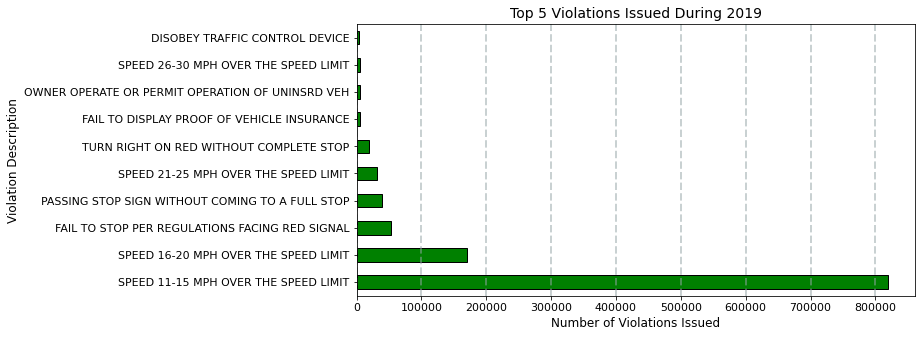

In [272]:
sorted_violation_count_per_month_for_the_year.head(10).plot(kind='barh', x='VIOLATION DESCRIPTION', y='YEARLY TOTALS', legend=False, color='green', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Violation Description', fontsize=12)
plt.xlabel('Number of Violations Issued', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.5)
plt.title('Top 5 Violations Issued During 2019', fontsize=14)

print('THE TOP 5 VIOLATIONS ISSUED DURING 2019 WERE:')
print('Speed 11-15 MPH Over the Speed Limit: 819,432')
print('Speed 16-20 MPH Over the Speed Limit: 170,163')
print('Fail to Stop Per Regulations Facing Red Signal: 52,660')
print('Passing Stop Sign Without Coming to a Full Stop: 39,064')
print('Speed 21-25 MPH Over the Speed Limit: 31,276')
print('Turn Right on Red without Complete Stop: 19,786')
print('Fail to Display Proof of Vehicle Insurance: 5,863')
print('Owner Operate or Permit Operation of Uninsured Vehicle: 4,980')
print('Speed 26-30 MPH Over the Speed Limit: 4,898')
print('Disobey Traffic Control Device: 4,353')

# Question 1: Total number of violations issued per agency for each month and the year

### I need to partner with Gene to see how this code works
* We need to determine how to visualize this

In [301]:
# Gene's Code 
# From the location column what area issues the most violations (Are more violations issued in a particular area of the city?)
area_issues_most = clean_twozeroonenine_df['LOCATION'].value_counts()

df_area=pd.DataFrame(area_issues_most)
max_area = df_area.iloc[0]
max_area

LOCATION    94889
Name: DC 295 .4mi s/o PA Ave SE sw/b (WZ), dtype: int64

In [302]:
# Gene's Code 
# From the location column what area issues the least violations (Are more violations issued in a particular area of the city?)
min_area = df_area.iloc[-1]
min_area

LOCATION    1
Name: AT 1700 K ST NW @CONNECTICUT AVE *, dtype: int64

### Print the combined, clean DataFrame for reference

In [273]:
clean_twozeroonenine_df.head()

,OBJECTID,LOCATION,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,DRV_LIC_STATE,DOB_YEAR,VEH_MAKE
0,8730,1400 BRANCH AVE SE,2019/04/29 04:00:00+00,1:30:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,100.0,DC,1985.0,CHRY
1,8731,I-295 ANACOSTIA FWY,2019/04/01 04:00:00+00,9:55:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,75.0,DC,1972.0,HOND
2,10053,I 395 N/B HOV BRIDGE SW,2019/04/18 04:00:00+00,4:20:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,VA,Y,100.0,VA,1987.0,MAZD
3,10054,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,DC,Y,150.0,DC,1993.0,TOYO
4,10055,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,DEAD OR EXPIRED TAGS,DC,Y,100.0,DC,1993.0,TOYO


### Here we used pd.date_range to assigne a number to each day of the week
* Monday = 0 to Sunday = 6

In [372]:
s = pd.date_range('2019/01/01 04:00:00+00', '2019/12/31 04:00:00+00', freq= 'D').to_series()
s.dt.dayofweek
     
   

2019-01-01 04:00:00+00:00    1
2019-01-02 04:00:00+00:00    2
2019-01-03 04:00:00+00:00    3
2019-01-04 04:00:00+00:00    4
2019-01-05 04:00:00+00:00    5
                            ..
2019-12-27 04:00:00+00:00    4
2019-12-28 04:00:00+00:00    5
2019-12-29 04:00:00+00:00    6
2019-12-30 04:00:00+00:00    0
2019-12-31 04:00:00+00:00    1
Freq: D, Length: 365, dtype: int64

### Here we turned the series from above into a DataFrame with the intention of merging/joining/concat-ing it with the clean_twozeroon

In [370]:
day_count = s.dt.dayofweek.to_frame()
day_count.reset_index(inplace=True)
#day_count = day_count.rename(columns = {'index': 'ISSUE_DATE', 0: 'Day of the Week'})
day_count

,index,0
0,2019-01-01 04:00:00+00:00,1
1,2019-01-02 04:00:00+00:00,2
2,2019-01-03 04:00:00+00:00,3
3,2019-01-04 04:00:00+00:00,4
4,2019-01-05 04:00:00+00:00,5
...,...,...
360,2019-12-27 04:00:00+00:00,4
361,2019-12-28 04:00:00+00:00,5
362,2019-12-29 04:00:00+00:00,6
363,2019-12-30 04:00:00+00:00,0


### Determine the violation count for each division for 2019
* Groupby 'ISSUING_AGENCY_NAME' and count the number of 'OBJECTID' for each
* Reset the index so that 'ISSUING_AGENCY_NAME' becomes a column
* Rename 'ISSUING_AGENCY_NAME' to 'AGENCY' and 'OBJECTID' to 'COUNT'
* Sort the 'COUNT' by decending order

In [299]:
agency_counts = clean_twozeroonenine_df.groupby('ISSUING_AGENCY_NAME').count()[['OBJECTID']]
agency_counts.reset_index(inplace=True)
agency_counts= agency_counts.rename(columns = {'ISSUING_AGENCY_NAME':'AGENCY', 'OBJECTID': 'COUNT'})
agency_counts.sort_values(['COUNT'], ascending=False)

,AGENCY,COUNT
29,SPECIAL OPERATION DIV & TRAFFIC DIV,1124348
13,METROPOLITAN POLICE DPT-DISTRICT 2,17177
12,METROPOLITAN POLICE DPT-DISTRICT 1,11997
14,METROPOLITAN POLICE DPT-DISTRICT 3,10857
17,METROPOLITAN POLICE DPT-DISTRICT 6,10774
16,METROPOLITAN POLICE DPT-DISTRICT 5,7607
15,METROPOLITAN POLICE DPT-DISTRICT 4,6904
18,METROPOLITAN POLICE DPT-DISTRICT 7,3633
35,UNITED STATES PARK POLICE,2141
34,UNITED STATES CAPITOL POLICE,1760


# Total count of violations for 2019, broken down by day of the week